In [84]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import ImageFont, ImageDraw, Image
import regex as re
import random

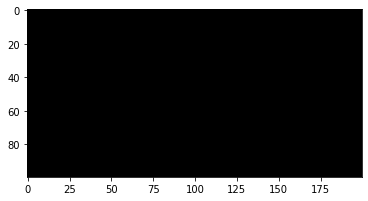

In [24]:
img = np.zeros([100,200,3],dtype=np.uint8) 
# img = cv2.imread('1.jpg')
plt.imshow(img)
# img

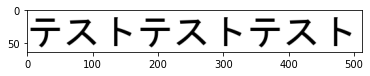

In [41]:


img = np.ones([64,512,3],dtype=np.uint8) *255



fontpath ='./msg.ttf' # Windows10 だと C:\Windows\Fonts\ 以下にフォントがあります。
b,g,r,a = 0,0,0,0 #B(青)・G(緑)・R(赤)・A(透明度)
font = ImageFont.truetype(fontpath, 56) # フォントサイズが32
img_pil = Image.fromarray(img) # 配列の各値を8bit(1byte)整数型(0～255)をPIL Imageに変換。
draw = ImageDraw.Draw(img_pil) # drawインスタンスを生成
message = 'テストテストテスト'
position = (0, 4) # テキスト表示位置
draw.text(position, message, font = font , fill = (b, g, r, a) ) # drawにテキストを記載 fill:色 BGRA (RGB)
img = np.array(img_pil) # PIL を配列に変換
## 表示
plt.imshow(img)

In [250]:
def gen(text,h,w,fontSize,fontW):

    bg_value = int(random.uniform(200,255))
    img = np.ones([h,w,3],dtype=np.uint8) * bg_value
    img[:,:,0] = img[:,:,0] * int(random.uniform(0,255))
    img[:,:,1] = img[:,:,1] * int(random.uniform(0,255))
    img[:,:,2] = img[:,:,2] * int(random.uniform(0,255))
    fontpath ='./msg.ttf' # Windows10 だと C:\Windows\Fonts\ 以下にフォントがあります。
#     int(random.uniform(0,255))
    b,g,r,a = int(random.uniform(0,255)),int(random.uniform(0,255)),int(random.uniform(0,255)),0 #B(青)・G(緑)・R(赤)・A(透明度)
    font = ImageFont.truetype(fontpath, fontSize) # フォントサイズが32
    img_pil = Image.fromarray(img) # 配列の各値を8bit(1byte)整数型(0～255)をPIL Imageに変換。
    draw = ImageDraw.Draw(img_pil) # drawインスタンスを生成
    message = text
    pos_y = h-fontSize

    max_font_pos_x = w - fontW
    pos_x = random.uniform(0,max_font_pos_x)
    position = (pos_x,int(pos_y/2)) # テキスト表示位置

    draw.text(position, message, font = font , fill = (b, g, r, a) ) # drawにテキストを記載 fill:色 BGRA (RGB)
    img = np.array(img_pil) # PIL を配列に変換
    h,w = img.shape[0],img.shape[1]
    angle = random.uniform(-2,2)
    mat = cv2.getRotationMatrix2D((h/2, 0), angle, 1)
    affine_img = cv2.warpAffine(img, mat, (w, h),borderValue=(bg_value,bg_value,bg_value))

    return affine_img

In [255]:
# kanji = '日 一 国 会 人 年 大 十 二 本 中 長 出 三 同 時 政 事 自 行 社 見 月 分 議 後 前 民 生 連 五 発 間 対 上 部 東 者 党 地 合 市 業 内 相 方 四 定 今 回 新 場 金 員 九 入 選 立 開 手 米 力 学 問 高 代 明 実 円 関 決 子 動 京 全 目 表 戦 経 通 外 最 言 氏 現 理 調 体 化 田 当 八 六 約 主 題 下 首 意 法 不 来 作 性 的 要 用 制 治 度 務 強 気 小 七 成 期 公 持 野 協 取 都 和 統 以 機 平 総 加 山 思 家 話 世 受 区 領 多 県 続 進 正 安 設 保 改 数 記 院 女 初 北 午 指 権 心 界 支 第 産 結 百 派 点 教 報 済 書 府 活 原 先 共 得 解 名 交 資 予 川 向 際 査 勝 面 委 告 軍 文 反 元 重 近 千 考 判 認 画 海 参 売 利 組 知 案 道 信 策 集 在 件 団 別 物 側 任 引 使 求 所 次 水 半 品 昨 論 計 死 官 増 係 感 特 情 投 示 変 打 男 基 私 各 始 島 直 両 朝 革 価 式 確 村 提 運 終 挙 果 西 勢 減 台 広 容 必 応 演 電 歳 住 争 談 能 無 再 位 置 企 真 流 格 有 疑 口 過 局 少 放 税 検 藤 町 常 校 料 沢 裁 状 工 建 語 球 営 空 職 証 土 与 急 止 送 援 供 可 役 構 木 割 聞 身 費 付 施 切 由 説 転 食 比 難 防 補 車 優 夫 研 収 断 井 何 南 石 足 違 消 境 神 番 規 術 護 展 態 導 鮮 備 宅 害 配 副 算 視 条 幹 独 警 宮 究 育 席 輸 訪 楽 起 万 着 乗 店 述 残 想 線 率 病 農 州 武 声 質 念 待 試 族 象 銀 域 助 労 例 衛 然 早 張 映 限 親 額 監 環 験 追 審 商 葉 義 伝 働 形 景 落 欧 担 好 退 準 賞 訴 辺 造 英 被 株 頭 技 低 毎 医 復 仕 去 姿 味 負 閣 韓 渡 失 移 差 衆 個 門 写 評 課 末 守 若 脳 極 種 美 岡 影 命 含 福 蔵 量 望 松 非 撃 佐 核 観 察 整 段 横 融 型 白 深 字 答 夜 製 票 況 音 申 様 財 港 識 注 呼 渉 達 良 響 阪 帰 針 専 推 谷 古 候 史 天 階 程 満 敗 管 値 歌 買 突 兵 接 請 器 士 光 討 路 悪 科 攻 崎 督 授 催 細 効 図 週 積 丸 他 及 湾 録 処 省 旧 室 憲 太 橋 歩 離 岸 客 風 紙 激 否 周 師 摘 材 登 系 批 郎 母 易 健 黒 火 戸 速 存 花 春 飛 殺 央 券 赤 号 単 盟 座 青 破 編 捜 竹 除 完 降 超 責 並 療 従 右 修 捕 隊 危 採 織 森 競 拡 故 館 振 給 屋 介 読 弁 根 色 友 苦 就 迎 走 販 園 具 左 異 歴 辞 将 秋 因 献 厳 馬 愛 幅 休 維 富 浜 父 遺 彼 般 未 塁 貿 講 邦 舞 林 装 諸 夏 素 亡 劇 河 遣 航 抗 冷 模 雄 適 婦 鉄 寄 益 込 顔 緊 類 児 余 禁 印 逆 王 返 標 換 久 短 油 妻 暴 輪 占 宣 背 昭 廃 植 熱 宿 薬 伊 江 清 習 険 頼 僚 覚 吉 盛 船 倍 均 億 途 圧 芸 許 皇 臨 踏 駅 署 抜 壊 債 便 伸 留 罪 停 興 爆 陸 玉 源 儀 波 創 障 継 筋 狙 帯 延 羽 努 固 闘 精 則 葬 乱 避 普 散 司 康 測 豊 洋 静 善 逮 婚 厚 喜 齢 囲 卒 迫 略 承 浮 惑 崩 順 紀 聴 脱 旅 絶 級 幸 岩 練 押 軽 倒 了 庁 博 城 患 締 等 救 執 層 版 老 令 角 絡 損 房 募 曲 撤 裏 払 削 密 庭 徒 措 仏 績 築 貨 志 混 載 昇 池 陣 我 勤 為 血 遅 抑 幕 居 染 温 雑 招 奈 季 困 星 傷 永 択 秀 著 徴 誌 庫 弾 償 刊 像 功 拠 香 欠 更 秘 拒 刑 坂 刻 底 賛 塚 致 抱 繰 服 犯 尾 描 布 恐 寺 鈴 盤 息 宇 項 喪 伴 遠 養 懸 戻 街 巨 震 願 絵 希 越 契 掲 躍 棄 欲 痛 触 邸 依 籍 汚 縮 還 枚 属 笑 互 複 慮 郵 束 仲 栄 札 枠 似 夕 恵 板 列 露 沖 探 逃 借 緩 節 需 骨 射 傾 届 曜 遊 迷 夢 巻 購 揮 君 燃 充 雨 閉 緒 跡 包 駐 貢 鹿 弱 却 端 賃 折 紹 獲 郡 併 草 徹 飲 貴 埼 衝 焦 奪 雇 災 浦 暮 替 析 預 焼 簡 譲 称 肉 納 樹 挑 章 臓 律 誘 紛 貸 至 宗 促 慎 控 贈 智 握 照 宙 酒 俊 銭 薄 堂 渋 群 銃 悲 秒 操 携 奥 診 詰 託 晴 撮 誕 侵 括 掛 謝 双 孝 刺 到 駆 寝 透 津 壁 稲 仮 暗 裂 敏 鳥 純 是 飯 排 裕 堅 訳 盗 芝 綱 吸 典 賀 扱 顧 弘 看 訟 戒 祉 誉 歓 勉 奏 勧 騒 翌 陽 閥 甲 快 縄 片 郷 敬 揺 免 既 薦 隣 悩 華 泉 御 範 隠 冬 徳 皮 哲 漁 杉 里 釈 己 荒 貯 硬 妥 威 豪 熊 歯 滞 微 隆 埋 症 暫 忠 倉 昼 茶 彦 肝 柱 喚 沿 妙 唱 祭 袋 阿 索 誠 忘 襲 雪 筆 吹 訓 懇 浴 俳 童 宝 柄 驚 麻 封 胸 娘 砂 李 塩 浩 誤 剤 瀬 趣 陥 斎 貫 仙 慰 賢 序 弟 旬 腕 兼 聖 旨 即 洗 柳 舎 偽 較 覇 兆 床 畑 慣 詳 毛 緑 尊 抵 脅 祝 礼 窓 柔 茂 犠 旗 距 雅 飾 網 竜 詩 昔 繁 殿 濃 翼 牛 茨 潟 敵 魅 嫌 魚 斉 液 貧 敷 擁 衣 肩 圏 零 酸 兄 罰 怒 滅 泳 礎 腐 祖 幼 脚 菱 荷 潮 梅 泊 尽 杯 僕 桜 滑 孤 黄 煕 炎 賠 句 寿 鋼 頑 甘 臣 鎖 彩 摩 浅 励 掃 雲 掘 縦 輝 蓄 軸 巡 疲 稼 瞬 捨 皆 砲 軟 噴 沈 誇 祥 牲 秩 帝 宏 唆 鳴 阻 泰 賄 撲 凍 堀 腹 菊 絞 乳 煙 縁 唯 膨 矢 耐 恋 塾 漏 紅'
hiragana='あいうえおかきくけこさしすせそたちつてとなにぬねのはひふへほまみむめもやゆよらりるれろわゐうゑをんアイウエオカキクケコサシスセソタチツテトナニヌネノハヒフヘホマミムメモヤユヨラリルレロワヰウヱヲンゔがぎぐげござじずぜぞだぢづでどばびぶべぼヴガギグゲゴザジズゼゾダヂヅデドバビブベボヷヸヹヺぱぴぷぺぽパピプペポ'
kanji = re.sub(' ','',kanji).replace(' ','')
alpha = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
txts = hiragana+alpha
txts

'あいうえおかきくけこさしすせそたちつてとなにぬねのはひふへほまみむめもやゆよらりるれろわゐうゑをんアイウエオカキクケコサシスセソタチツテトナニヌネノハヒフヘホマミムメモヤユヨラリルレロワヰウヱヲンゔがぎぐげござじずぜぞだぢづでどばびぶべぼヴガギグゲゴザジズゼゾダヂヅデドバビブベボヷヸヹヺぱぴぷぺぽパピプペポabcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'

In [258]:
h=70
w=520
for i in range(10000):
    fontSize = int(random.uniform(h*0.3,h*0.6))
    fontW = int(random.uniform(w/2,w))
    txt_num = fontW//fontSize
    l =  random.sample(txts,txt_num)
    ll = ''.join(l)
    img = gen(ll,h,w,fontSize,fontW)
    cv2.imwrite(f'./kigo/{ll}.jpg',img)
#     break
#     plt.imshow(img)
#     plt.show()

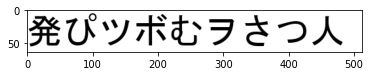

In [167]:
import tensorflow as tf

plt.imshow(img)
def imshow(img):
    plt.imshow(img)
    plt.show()

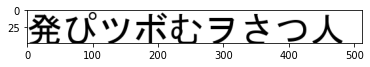

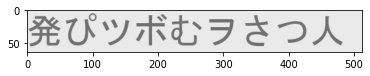

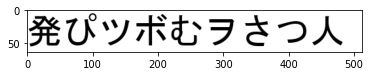

In [207]:
img_c = tf.image.random_crop(img,(50,512,3))
imshow(img_c)
img_d = tf.image.random_contrast(img,lower=0.2, upper=1.8)
imshow(img_d)
img_e = tf.image.random_hue(img,0.4)
imshow(img_e)

In [209]:
kanji = '日 一 国 会 人 年 大 十 二 本 中 長 出 三 同 時 政 事 自 行 社 見 月 分 議 後 前 民 生 連 五 発 間 対 上 部 東 者 党 地 合 市 業 内 相 方 四 定 今 回 新 場 金 員 九 入 選 立 開 手 米 力 学 問 高 代 明 実 円 関 決 子 動 京 全 目 表 戦 経 通 外 最 言 氏 現 理 調 体 化 田 当 八 六 約 主 題 下 首 意 法 不 来 作 性 的 要 用 制 治 度 務 強 気 小 七 成 期 公 持 野 協 取 都 和 統 以 機 平 総 加 山 思 家 話 世 受 区 領 多 県 続 進 正 安 設 保 改 数 記 院 女 初 北 午 指 権 心 界 支 第 産 結 百 派 点 教 報 済 書 府 活 原 先 共 得 解 名 交 資 予 川 向 際 査 勝 面 委 告 軍 文 反 元 重 近 千 考 判 認 画 海 参 売 利 組 知 案 道 信 策 集 在 件 団 別 物 側 任 引 使 求 所 次 水 半 品 昨 論 計 死 官 増 係 感 特 情 投 示 変 打 男 基 私 各 始 島 直 両 朝 革 価 式 確 村 提 運 終 挙 果 西 勢 減 台 広 容 必 応 演 電 歳 住 争 談 能 無 再 位 置 企 真 流 格 有 疑 口 過 局 少 放 税 検 藤 町 常 校 料 沢 裁 状 工 建 語 球 営 空 職 証 土 与 急 止 送 援 供 可 役 構 木 割 聞 身 費 付 施 切 由 説 転 食 比 難 防 補 車 優 夫 研 収 断 井 何 南 石 足 違 消 境 神 番 規 術 護 展 態 導 鮮 備 宅 害 配 副 算 視 条 幹 独 警 宮 究 育 席 輸 訪 楽 起 万 着 乗 店 述 残 想 線 率 病 農 州 武 声 質 念 待 試 族 象 銀 域 助 労 例 衛 然 早 張 映 限 親 額 監 環 験 追 審 商 葉 義 伝 働 形 景 落 欧 担 好 退 準 賞 訴 辺 造 英 被 株 頭 技 低 毎 医 復 仕 去 姿 味 負 閣 韓 渡 失 移 差 衆 個 門 写 評 課 末 守 若 脳 極 種 美 岡 影 命 含 福 蔵 量 望 松 非 撃 佐 核 観 察 整 段 横 融 型 白 深 字 答 夜 製 票 況 音 申 様 財 港 識 注 呼 渉 達 良 響 阪 帰 針 専 推 谷 古 候 史 天 階 程 満 敗 管 値 歌 買 突 兵 接 請 器 士 光 討 路 悪 科 攻 崎 督 授 催 細 効 図 週 積 丸 他 及 湾 録 処 省 旧 室 憲 太 橋 歩 離 岸 客 風 紙 激 否 周 師 摘 材 登 系 批 郎 母 易 健 黒 火 戸 速 存 花 春 飛 殺 央 券 赤 号 単 盟 座 青 破 編 捜 竹 除 完 降 超 責 並 療 従 右 修 捕 隊 危 採 織 森 競 拡 故 館 振 給 屋 介 読 弁 根 色 友 苦 就 迎 走 販 園 具 左 異 歴 辞 将 秋 因 献 厳 馬 愛 幅 休 維 富 浜 父 遺 彼 般 未 塁 貿 講 邦 舞 林 装 諸 夏 素 亡 劇 河 遣 航 抗 冷 模 雄 適 婦 鉄 寄 益 込 顔 緊 類 児 余 禁 印 逆 王 返 標 換 久 短 油 妻 暴 輪 占 宣 背 昭 廃 植 熱 宿 薬 伊 江 清 習 険 頼 僚 覚 吉 盛 船 倍 均 億 途 圧 芸 許 皇 臨 踏 駅 署 抜 壊 債 便 伸 留 罪 停 興 爆 陸 玉 源 儀 波 創 障 継 筋 狙 帯 延 羽 努 固 闘 精 則 葬 乱 避 普 散 司 康 測 豊 洋 静 善 逮 婚 厚 喜 齢 囲 卒 迫 略 承 浮 惑 崩 順 紀 聴 脱 旅 絶 級 幸 岩 練 押 軽 倒 了 庁 博 城 患 締 等 救 執 層 版 老 令 角 絡 損 房 募 曲 撤 裏 払 削 密 庭 徒 措 仏 績 築 貨 志 混 載 昇 池 陣 我 勤 為 血 遅 抑 幕 居 染 温 雑 招 奈 季 困 星 傷 永 択 秀 著 徴 誌 庫 弾 償 刊 像 功 拠 香 欠 更 秘 拒 刑 坂 刻 底 賛 塚 致 抱 繰 服 犯 尾 描 布 恐 寺 鈴 盤 息 宇 項 喪 伴 遠 養 懸 戻 街 巨 震 願 絵 希 越 契 掲 躍 棄 欲 痛 触 邸 依 籍 汚 縮 還 枚 属 笑 互 複 慮 郵 束 仲 栄 札 枠 似 夕 恵 板 列 露 沖 探 逃 借 緩 節 需 骨 射 傾 届 曜 遊 迷 夢 巻 購 揮 君 燃 充 雨 閉 緒 跡 包 駐 貢 鹿 弱 却 端 賃 折 紹 獲 郡 併 草 徹 飲 貴 埼 衝 焦 奪 雇 災 浦 暮 替 析 預 焼 簡 譲 称 肉 納 樹 挑 章 臓 律 誘 紛 貸 至 宗 促 慎 控 贈 智 握 照 宙 酒 俊 銭 薄 堂 渋 群 銃 悲 秒 操 携 奥 診 詰 託 晴 撮 誕 侵 括 掛 謝 双 孝 刺 到 駆 寝 透 津 壁 稲 仮 暗 裂 敏 鳥 純 是 飯 排 裕 堅 訳 盗 芝 綱 吸 典 賀 扱 顧 弘 看 訟 戒 祉 誉 歓 勉 奏 勧 騒 翌 陽 閥 甲 快 縄 片 郷 敬 揺 免 既 薦 隣 悩 華 泉 御 範 隠 冬 徳 皮 哲 漁 杉 里 釈 己 荒 貯 硬 妥 威 豪 熊 歯 滞 微 隆 埋 症 暫 忠 倉 昼 茶 彦 肝 柱 喚 沿 妙 唱 祭 袋 阿 索 誠 忘 襲 雪 筆 吹 訓 懇 浴 俳 童 宝 柄 驚 麻 封 胸 娘 砂 李 塩 浩 誤 剤 瀬 趣 陥 斎 貫 仙 慰 賢 序 弟 旬 腕 兼 聖 旨 即 洗 柳 舎 偽 較 覇 兆 床 畑 慣 詳 毛 緑 尊 抵 脅 祝 礼 窓 柔 茂 犠 旗 距 雅 飾 網 竜 詩 昔 繁 殿 濃 翼 牛 茨 潟 敵 魅 嫌 魚 斉 液 貧 敷 擁 衣 肩 圏 零 酸 兄 罰 怒 滅 泳 礎 腐 祖 幼 脚 菱 荷 潮 梅 泊 尽 杯 僕 桜 滑 孤 黄 煕 炎 賠 句 寿 鋼 頑 甘 臣 鎖 彩 摩 浅 励 掃 雲 掘 縦 輝 蓄 軸 巡 疲 稼 瞬 捨 皆 砲 軟 噴 沈 誇 祥 牲 秩 帝 宏 唆 鳴 阻 泰 賄 撲 凍 堀 腹 菊 絞 乳 煙 縁 唯 膨 矢 耐 恋 塾 漏 紅'
re.sub(' ','',jpn)

'日一国会人年大十二本中長出三同時政事自行社見月分議後前民生連五発間対上部東者党地合市業内相方四定今回新場金員九入選立開手米力学問高代明実円関決子動京全目表戦経通外最言氏現理調体化田当八六約主題下首意法不来作性的要用制治度務強気小七成期公持野協取都和統以機平総加山思家話世受区領多県続進正安設保改数記院女初北午指権心界支第産結百派点教報済書府活原先共得解名交資予川向際査勝面委告軍文反元重近千考判認画海参売利組知案道信策集在件団別物側任引使求所次水半品昨論計死官増係感特情投示変打男基私各始島直両朝革価式確村提運終挙果西勢減台広容必応演電歳住争談能無再位置企真流格有疑口過局少放税検藤町常校料沢裁状工建語球営空職証土与急止送援供可役構木割聞身費付施切由説転食比難防補車優夫研収断井何南石足違消境神番規術護展態導鮮備宅害配副算視条幹独警宮究育席輸訪楽起万着乗店述残想線率病農州武声質念待試族象銀域助労例衛然早張映限親額監環験追審商葉義伝働形景落欧担好退準賞訴辺造英被株頭技低毎医復仕去姿味負閣韓渡失移差衆個門写評課末守若脳極種美岡影命含福蔵量望松非撃佐核観察整段横融型白深字答夜製票況音申様財港識注呼渉達良響阪帰針専推谷古候史天階程満敗管値歌買突兵接請器士光討路悪科攻崎督授催細効図週積丸他及湾録処省旧室憲太橋歩離岸客風紙激否周師摘材登系批郎母易健黒火戸速存花春飛殺央券赤号単盟座青破編捜竹除完降超責並療従右修捕隊危採織森競拡故館振給屋介読弁根色友苦就迎走販園具左異歴辞将秋因献厳馬愛幅休維富浜父遺彼般未塁貿講邦舞林装諸夏素亡劇河遣航抗冷模雄適婦鉄寄益込顔緊類児余禁印逆王返標換久短油妻暴輪占宣背昭廃植熱宿薬伊江清習険頼僚覚吉盛船倍均億途圧芸許皇臨踏駅署抜壊債便伸留罪停興爆陸玉源儀波創障継筋狙帯延羽努固闘精則葬乱避普散司康測豊洋静善逮婚厚喜齢囲卒迫略承浮惑崩順紀聴脱旅絶級幸岩練押軽倒了庁博城患締等救執層版老令角絡損房募曲撤裏払削密庭徒措仏績築貨志混載昇池陣我勤為血遅抑幕居染温雑招奈季困星傷永択秀著徴誌庫弾償刊像功拠香欠更秘拒刑坂刻底賛塚致抱繰服犯尾描布恐寺鈴盤息宇項喪伴遠養懸戻街巨震願絵希越契掲躍棄欲痛触邸依籍汚縮還枚属笑互複慮郵束仲栄札枠似夕恵板列露沖探逃借緩節需骨射傾届曜遊迷夢巻購揮君燃充雨閉緒跡包駐貢鹿弱却端賃折紹獲郡併草徹飲貴埼衝焦奪雇災浦暮替析預焼簡譲称肉納樹挑章臓律誘紛貸至宗促慎